In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import pickle

In [4]:
# Load dataframe median
with open("./median_graph.p", 'rb') as f:  # notice the r instead of w
    median_graph = pickle.load(f)

In [54]:
# Load dataframe median
with open("./graph_2006.p", 'rb') as f:  # notice the r instead of w
    graph_2006 = pickle.load(f)

In [51]:
flipped_dict = {
    "AL": (-86.791130, 32.806671),
    # "AK": (-152.404419, 61.370716),
    "AZ": (-111.431221, 33.729759),
    "AR": (-92.373123, 34.969704),
    "CA": (-119.681564, 36.116203),
    "CO": (-105.311104, 39.059811),
    "CT": (-72.755371, 41.597782),
    "DE": (-75.507141, 39.318523),
    "FL": (-81.686783, 27.766279),
    "GA": (-83.643074, 33.040619),
    # "HI": (-157.498337, 21.094318),
    "ID": (-114.478828, 44.240459),
    "IL": (-88.986137, 40.349457),
    "IN": (-86.258278, 39.849426),
    "IA": (-93.210526, 42.011539),
    "KS": (-96.726486, 38.526600),
    "KY": (-84.670067, 37.668140),
    "LA": (-91.867805, 31.169546),
    "ME": (-69.381927, 44.693947),
    "MD": (-76.802101, 39.063946),
    "MA": (-71.530106, 42.230171),
    "MI": (-84.536095, 43.326618),
    "MN": (-93.900192, 45.694454),
    "MS": (-89.678696, 32.741646),
    "MO": (-92.288368, 38.456085),
    "MT": (-110.454353, 46.921925),
    "NE": (-98.268082, 41.125370),
    "NV": (-117.055374, 38.313515),
    "NH": (-71.563896, 43.452492),
    "NJ": (-74.521011, 40.298904),
    "NM": (-106.248482, 34.840515),
    "NY": (-74.948051, 42.165726),
    "NC": (-79.806419, 35.630066),
    "ND": (-99.784012, 47.528912),
    "OH": (-82.764915, 40.388783),
    "OK": (-96.928917, 35.565342),
    "OR": (-122.070938, 44.572021),
    "PA": (-77.209755, 40.590752),
    "RI": (-71.511780, 41.680893),
    "SC": (-80.945007, 33.856892),
    "SD": (-99.438828, 44.299782),
    "TN": (-86.350493, 35.747845),
    "TX": (-97.563461, 31.054487),
    "UT": (-111.862434, 40.150032),
    "VT": (-72.710686, 44.045876),
    "VA": (-78.169968, 37.769337),
    "WA": (-120.740135, 47.751076),
    "WV": (-80.454903, 38.597626),
    "WI": (-89.616508, 44.268544),
    "WY":  (-107.302490, 42.755966),
    "DC": (-77.007507, 38.900497)
}


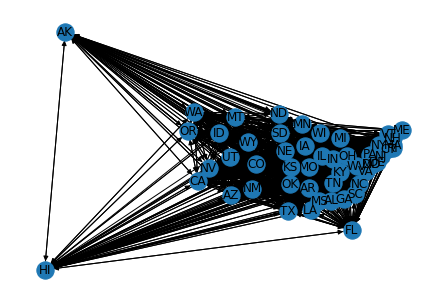

In [14]:
nx.draw(median_graph, with_labels=True, pos=flipped_dict)
plt.show()

In [55]:
median_graph_copy = median_graph.copy()
graph_2006_copy = graph_2006.copy()

In [56]:
median_graph_copy.remove_node("AK")
median_graph_copy.remove_node("HI")
graph_2006_copy.remove_node("AK")
graph_2006_copy.remove_node("HI")


In [58]:
node_sizes = [a * 2000 for a in list(nx.degree_centrality(median_graph_copy).values())]
node_sizes_2006 = [a * 2000 for a in list(nx.degree_centrality(graph_2006_copy).values())]

In [97]:
node_sizes = [a * 20000 for a in list(nx.betweenness_centrality(median_graph_copy, weight='weight').values())]
node_sizes_2006 = [a * 20000 for a in list(nx.betweenness_centrality(graph_2006_copy, weight='weight').values())]


In [98]:
node_sizes = [a * 20000 for a in list(nx.hits(median_graph_copy)[0].values())]
node_sizes_2006 = [a * 20000 for a in list(nx.hits(graph_2006_copy)[0].values())]


In [116]:
node_sizes = [a * 40000 for a in list(nx.pagerank(median_graph_copy).values())]
node_sizes_2006 = [a * 40000 for a in list(nx.pagerank(graph_2006_copy).values())]


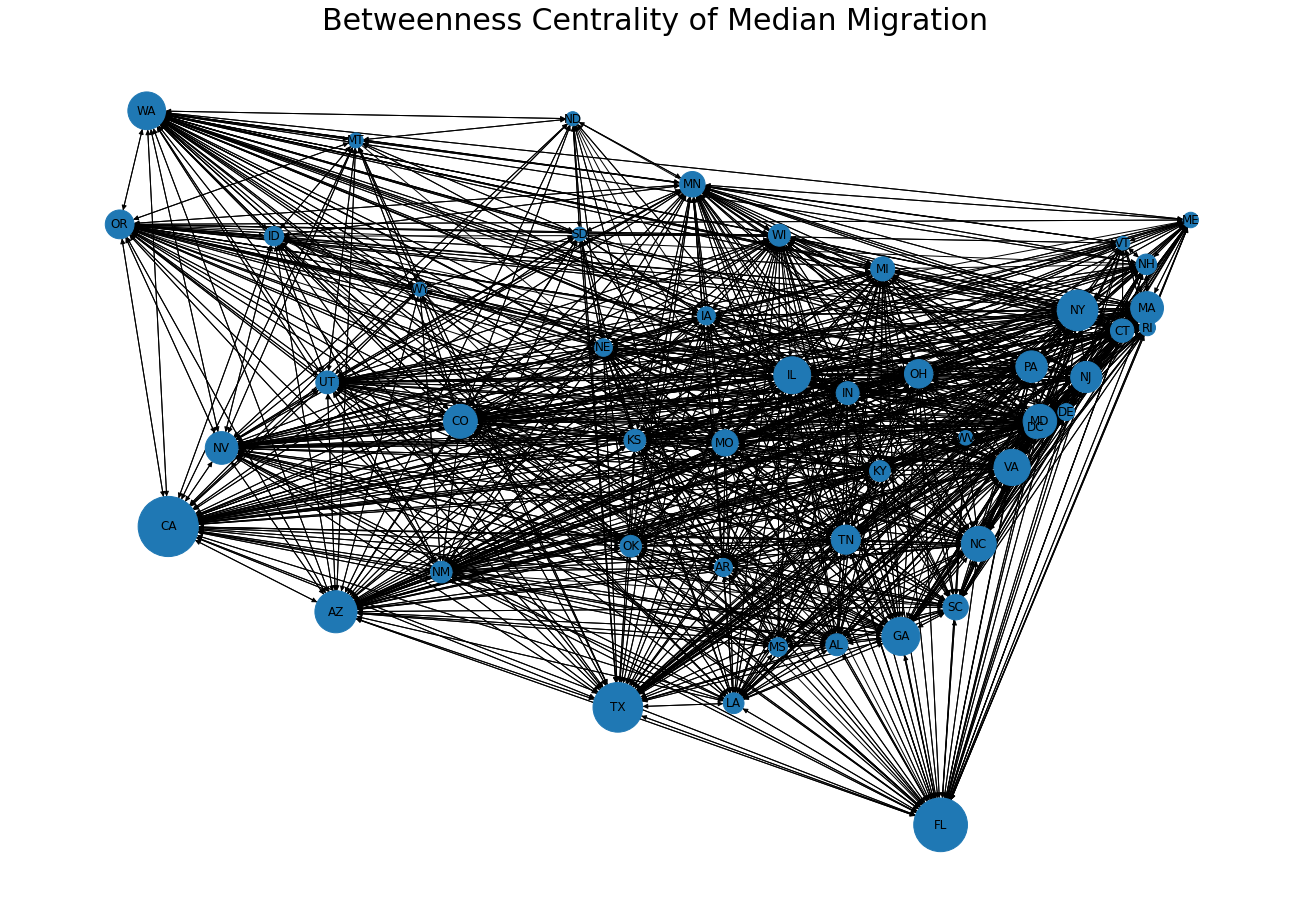

In [117]:
plt.figure(3,figsize=(18,12)) 
nx.draw(median_graph_copy, with_labels=True, pos=flipped_dict, node_size=node_sizes)
plt.title('Betweenness Centrality of Median Migration', fontsize=30)
plt.show()

plt.figure(3,figsize=(18,12)) 
nx.draw(graph_2006_copy, with_labels=True, pos=flipped_dict, node_size=node_sizes_2006)
plt.title('Betweenness Centrality of 2006 Migration', fontsize=30)
plt.show()

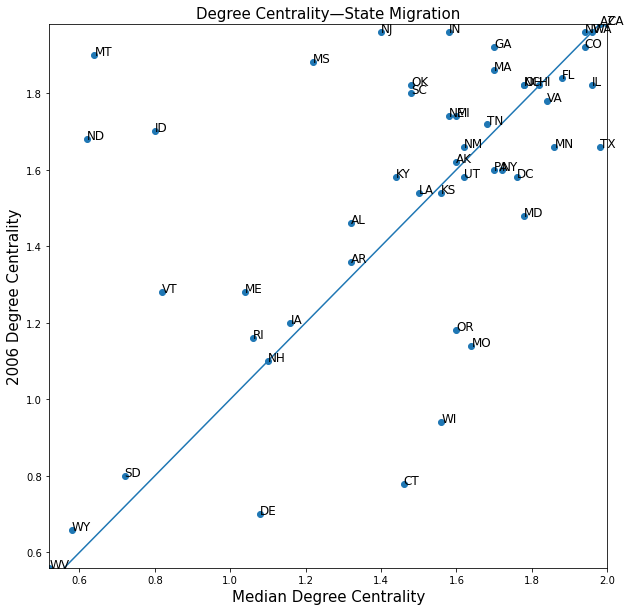

In [90]:
# scatterplot of median vs. 2006 migrations (median on x-axis, 2006 on y-axis)
degree_median = nx.degree_centrality(median_graph)
x = list(degree_median.values())
y = list(nx.degree_centrality(graph_2006).values())
n = list(degree_median.keys())

fig, ax = plt.subplots(figsize=(10,10))
ax.axline((0, 0), slope=1)
plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))
plt.title('Degree Centrality—State Migration', fontsize=15)
plt.xlabel('Median Degree Centrality', fontsize=15)
plt.ylabel('2006 Degree Centrality', fontsize=15)
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]), fontsize=12)

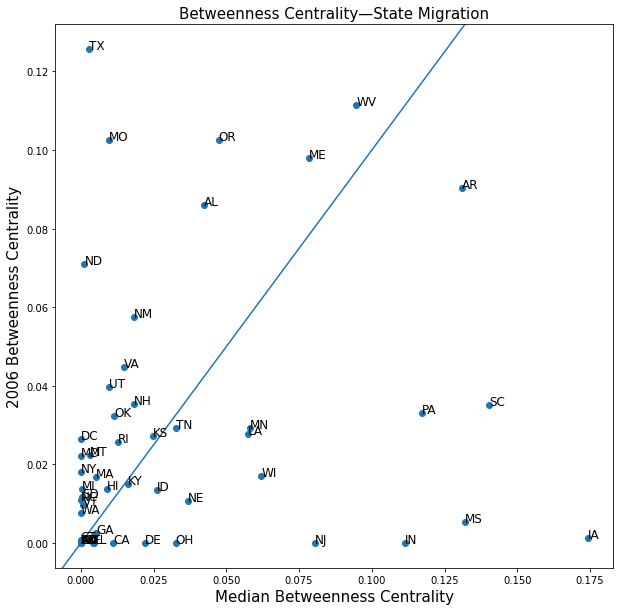

In [88]:
# scatterplot of betweenness median vs. 2006 migrations (median on x-axis, 2006 on y-axis)
degree_median = nx.betweenness_centrality(median_graph, weight='weight')
x = list(degree_median.values())
y = list(nx.betweenness_centrality(graph_2006, weight='weight').values())
n = list(degree_median.keys())

fig, ax = plt.subplots(figsize=(10,10))
ax.axline((0, 0), slope=1)
# plt.xlim(min(x), max(x))
# plt.ylim(min(y), max(y))
plt.title('Betweenness Centrality—State Migration', fontsize=15)
plt.xlabel('Median Betweenness Centrality', fontsize=15)
plt.ylabel('2006 Betweenness Centrality', fontsize=15)
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]), fontsize=12)

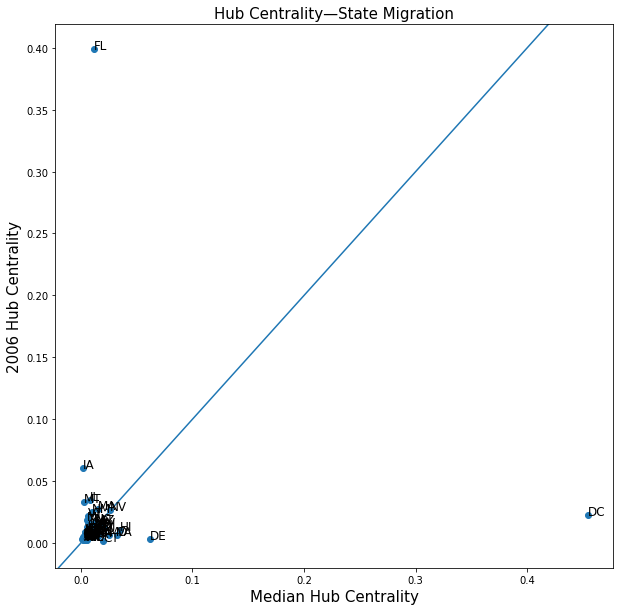

In [109]:
# scatterplot of betweenness median vs. 2006 migrations (median on x-axis, 2006 on y-axis)
degree_median = nx.hits(median_graph)[0]
x = list(degree_median.values())
y = list(nx.hits(graph_2006)[0].values())
n = list(degree_median.keys())

fig, ax = plt.subplots(figsize=(10,10))
ax.axline((0, 0), slope=1)
# plt.xlim(min(x), max(x))
# plt.ylim(min(y), max(y))
plt.title('Hub Centrality—State Migration', fontsize=15)
plt.xlabel('Median Hub Centrality', fontsize=15)
plt.ylabel('2006 Hub Centrality', fontsize=15)
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]), fontsize=12)

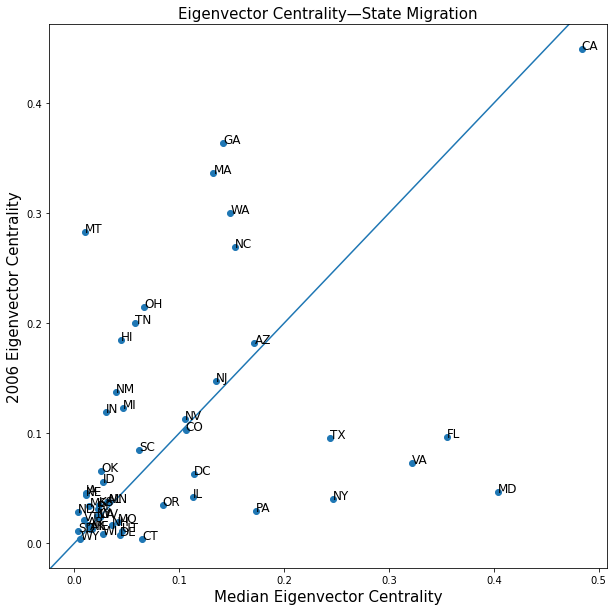

In [112]:
# scatterplot of betweenness median vs. 2006 migrations (median on x-axis, 2006 on y-axis)
degree_median = nx.eigenvector_centrality(median_graph, max_iter=5000, weight='weight')
x = list(degree_median.values())
y = list(nx.eigenvector_centrality(graph_2006, max_iter=5000, weight='weight').values())
n = list(degree_median.keys())

fig, ax = plt.subplots(figsize=(10,10))
ax.axline((0, 0), slope=1)
# plt.xlim(min(x), max(x))
# plt.ylim(min(y), max(y))
plt.title('Eigenvector Centrality—State Migration', fontsize=15)
plt.xlabel('Median Eigenvector Centrality', fontsize=15)
plt.ylabel('2006 Eigenvector Centrality', fontsize=15)
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]), fontsize=12)

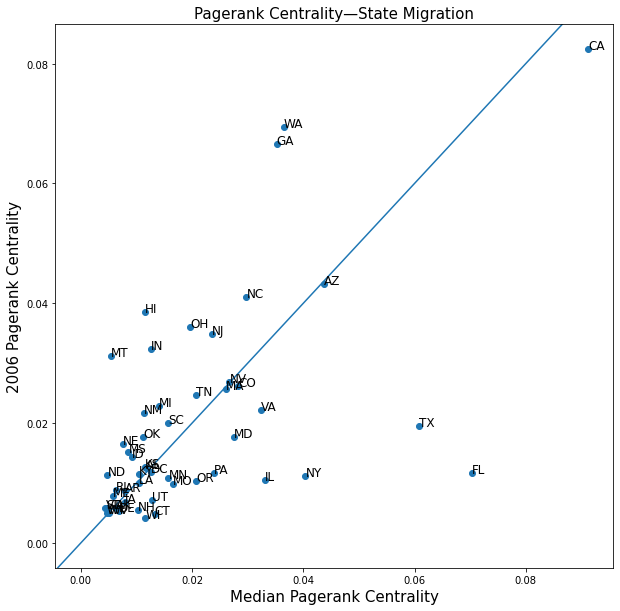

In [113]:
# scatterplot of betweenness median vs. 2006 migrations (median on x-axis, 2006 on y-axis)
degree_median = nx.pagerank(median_graph)
x = list(degree_median.values())
y = list(nx.pagerank(graph_2006).values())
n = list(degree_median.keys())

fig, ax = plt.subplots(figsize=(10,10))
ax.axline((0, 0), slope=1)
# plt.xlim(min(x), max(x))
# plt.ylim(min(y), max(y))
plt.title('Pagerank Centrality—State Migration', fontsize=15)
plt.xlabel('Median Pagerank Centrality', fontsize=15)
plt.ylabel('2006 Pagerank Centrality', fontsize=15)
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]), fontsize=12)

In [106]:
nx.hits(median_graph)[0].values()

dict_values([0.0039087658909616515, 0.011708000397836106, 0.016208268523235453, 0.002326535092847306, 0.006616494325843815, 0.012321531944591105, 0.45445672349156213, 0.012078498709302462, 0.009453354557127987, 0.0353947300761673, 0.007868965942504812, 0.003682121357533636, 0.004743236622200609, 0.0030731683699003107, 0.004718056732026963, 0.0255515217687748, 0.015707024001195384, 0.005149373881824592, 0.004498399522570186, 0.002486048774200545, 0.004574245614810008, 0.0037178332067936038, 0.026088691804618147, 0.009709427892262713, 0.014133168743607188, 0.012541770477575206, 0.005756367851582583, 0.004998666887418929, 0.015103824465287222, 0.008382113926052141, 0.0060118012461681854, 0.006897065135394701, 0.03232681729788772, 0.011623159016255557, 0.004564440932214246, 0.00247993754251554, 0.020971037742761142, 0.0018688782308072939, 0.009729677252804731, 0.0010790947153852728, 0.009008754215394698, 0.0024537796561774424, 0.020314376213938036, 0.06173980538997848, 0.002263874104813975